In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
bcw_train = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'bcw_train.csv'))
bcw_test = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'bcw_test.csv'))
model_metrics = pd.read_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'model_metrics.csv'))

Mounted at /content/drive


# Training KNN

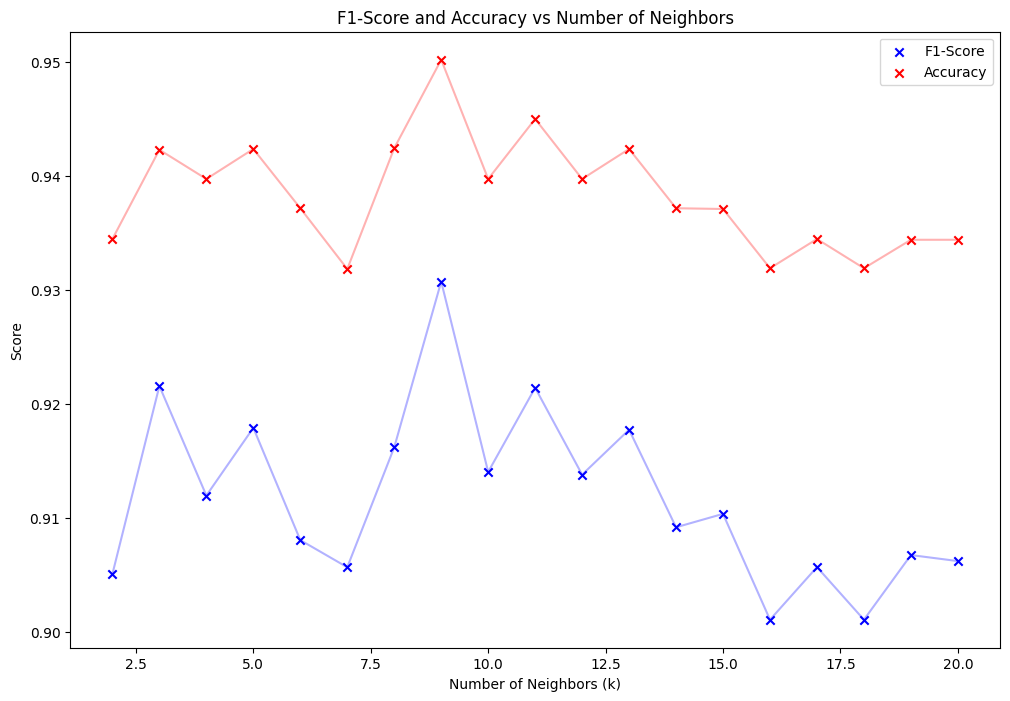

(9,
 [(2, 0.9051073498659706, 0.934480431848853),
  (3, 0.9215883892608032, 0.9423076923076923),
  (4, 0.9119835515697586, 0.9397435897435897),
  (5, 0.9179216875078945, 0.9423751686909583),
  (6, 0.9080757020757023, 0.9371794871794871)])

In [ ]:
# Import CV related libraries
from sklearn.model_selection import StratifiedKFold
# Import performance related libraries
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix, RocCurveDisplay)

metrics_df = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                          index=[f"Fold {i}" for i in np.arange(0, 10)])

from sklearn.neighbors import KNeighborsClassifier

scv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
X, y = bcw_train.drop('target', axis=1), bcw_train['target']


# List to store the mean of each fold
average_metrics = []
avg_f1_values = []
avg_accuracy_values = []



fig, ax = plt.subplots(figsize=(12, 8))
for k in range(2, 21):
    fold_metrics = {'F1-Score': [], 'Accuracy': []}

    # Stratified K-Fold Cross-Validation
    for i, (train, validation) in enumerate(scv.split(X, y)):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X.iloc[train], y.iloc[train])

        y_pred = knn.predict(X.iloc[validation])
        fold_metrics['F1-Score'].append(f1_score(y.iloc[validation], y_pred))
        fold_metrics['Accuracy'].append(accuracy_score(y.iloc[validation], y_pred))


        # Calculate and save the metrics
        metrics_df.loc[f'Fold {i}', 'Accuracy'] = accuracy_score(y.iloc[validation], y_pred)
        metrics_df.loc[f'Fold {i}', 'Precision'] = precision_score(y.iloc[validation], y_pred)
        metrics_df.loc[f'Fold {i}', 'Recall'] = recall_score(y.iloc[validation], y_pred)
        metrics_df.loc[f'Fold {i}', 'F1-Score'] = f1_score(y.iloc[validation], y_pred)

    # Calculate average metrics for this k value
    avg_f1 = np.mean(fold_metrics['F1-Score'])
    avg_accuracy = np.mean(fold_metrics['Accuracy'])
    # These two lists save the data to plot the line
    avg_f1_values.append(avg_f1)
    avg_accuracy_values.append(avg_accuracy)
    # Plotting the average F1-Score and Accuracy for this k value
    ax.scatter(k, avg_f1, color='b', marker='x')
    ax.scatter(k, avg_accuracy, color='r', marker='x')
    # Save the neighbours and the fold score for that neightbour
    average_metrics.append((k, avg_f1, avg_accuracy))

ax.plot(range(2, 21), avg_f1_values, color='b', alpha=0.3)
ax.plot(range(2, 21), avg_accuracy_values, color='r', alpha=0.3)

ax.set_xlabel('Number of Neighbors (k)')
ax.set_ylabel('Score')
ax.set_title('F1-Score and Accuracy vs Number of Neighbors')
ax.legend(['F1-Score', 'Accuracy'])
plt.show()

# Find the best k value based on average F1-Score
best_k = max(average_metrics, key=lambda x: x[1])[0]
# Output the best k value and first few average metrics for review
best_k, average_metrics[:5]

In [ ]:
average_metrics_df = pd.DataFrame(average_metrics, columns=['Neighbour', 'F1-Score', 'Accuracy'])



print(average_metrics_df.to_latex(index=True,
                  float_format="{:.3f}".format,
))

\begin{tabular}{lrrr}
\toprule
{} &  Neighbour &  F1-Score &  Accuracy \\
\midrule
0  &          2 &     0.905 &     0.934 \\
1  &          3 &     0.922 &     0.942 \\
2  &          4 &     0.912 &     0.940 \\
3  &          5 &     0.918 &     0.942 \\
4  &          6 &     0.908 &     0.937 \\
5  &          7 &     0.906 &     0.932 \\
6  &          8 &     0.916 &     0.942 \\
7  &          9 &     0.931 &     0.950 \\
8  &         10 &     0.914 &     0.940 \\
9  &         11 &     0.921 &     0.945 \\
10 &         12 &     0.914 &     0.940 \\
11 &         13 &     0.918 &     0.942 \\
12 &         14 &     0.909 &     0.937 \\
13 &         15 &     0.910 &     0.937 \\
14 &         16 &     0.901 &     0.932 \\
15 &         17 &     0.906 &     0.934 \\
16 &         18 &     0.901 &     0.932 \\
17 &         19 &     0.907 &     0.934 \\
18 &         20 &     0.906 &     0.934 \\
\bottomrule
\end{tabular}



# Test

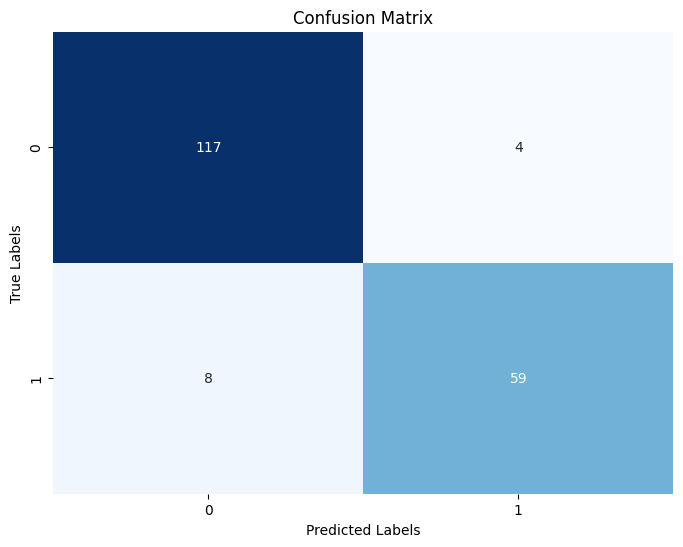

\begin{tabular}{lrrrr}
\toprule
{} &  Accuracy &  Precision &  Recall &  F1-Score \\
\midrule
0 &     0.936 &      0.936 &   0.881 &     0.908 \\
\bottomrule
\end{tabular}



In [ ]:
# Initialize the KNN classifier and fit
X, y = bcw_train.drop('target', axis=1), bcw_train['target']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X, y)
X_test, y_test = bcw_test.drop('target', axis=1), bcw_test['target']

y_pred = knn_best.predict(X_test)

final_metrics = pd.DataFrame(data={'Accuracy': accuracy_score(y_test, y_pred),
                                   'Precision': accuracy_score(y_test, y_pred),
                                   'Recall': recall_score(y_test, y_pred),
                                   'F1-Score': f1_score(y_test, y_pred)}, index=[0])
final_metrics['Model'] = 'KNN'
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(final_metrics.iloc[:, :-1].to_latex(index=True,
                  float_format="{:.3f}".format,
))

In [ ]:
model_metrics = pd.concat([model_metrics, final_metrics], ignore_index=True)

In [ ]:
model_metrics

,Accuracy,Precision,Recall,F1-Score,Model
0,0.882979,0.882979,0.820896,0.833333,GNB
1,0.936170,0.936170,0.880597,0.907692,KNN


In [ ]:
model_metrics.to_csv(os.path.join('/content/drive/MyDrive/Datasets/SI_final_project', 'model_metrics.csv'), index=False)